In [19]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

SEQN - Порядковый номер респондента

age_group - Возрастная группа респондента (старший/нестарший)

RIDAGEYR- Возраст респондента

RIAGENDR- Пол респондента

PAQ605- Если респондент занимается спортом средней или высокой интенсивности, фитнесом или развлекательными мероприятиями в течение типичной недели

BMXBMI -Индекс массы тела респондента

LBXGLU-Уровень глюкозы в крови респондента после голодания

DIQ010-Если респондент болен диабетом

LBXGLT-Устные показания ответчика

LBXIN-Уровень инсулина в крови респондента

In [20]:
dataset = pd.read_csv('/content/drive/MyDrive/data/NHANES_age_prediction.csv')
dataset.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [21]:
dataset.head()


,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [22]:
vals=dataset['age_group'].unique()
vals

array(['Adult', 'Senior'], dtype=object)

In [23]:
dataset2 = dataset.drop(['age_group'], axis=1)
dataset2 = dataset2.drop(['SEQN'], axis=1)
dataset2.head()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [24]:
X = dataset2
y = dataset["age_group"].replace(vals, [0, 1])
yvals = dataset["age_group"]

<ipython-input-24-4cf37c461038>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dataset["age_group"].replace(vals, [0, 1])


In [25]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

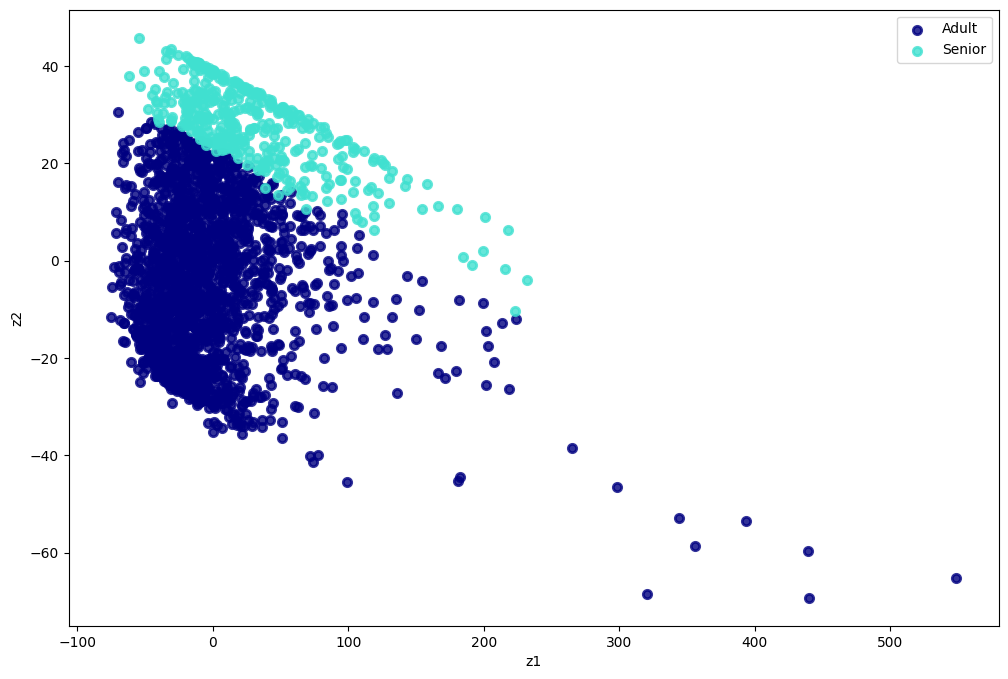

In [26]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], dataset2):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [27]:
pca.explained_variance_ratio_

array([0.78743359, 0.11726503])

In [28]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

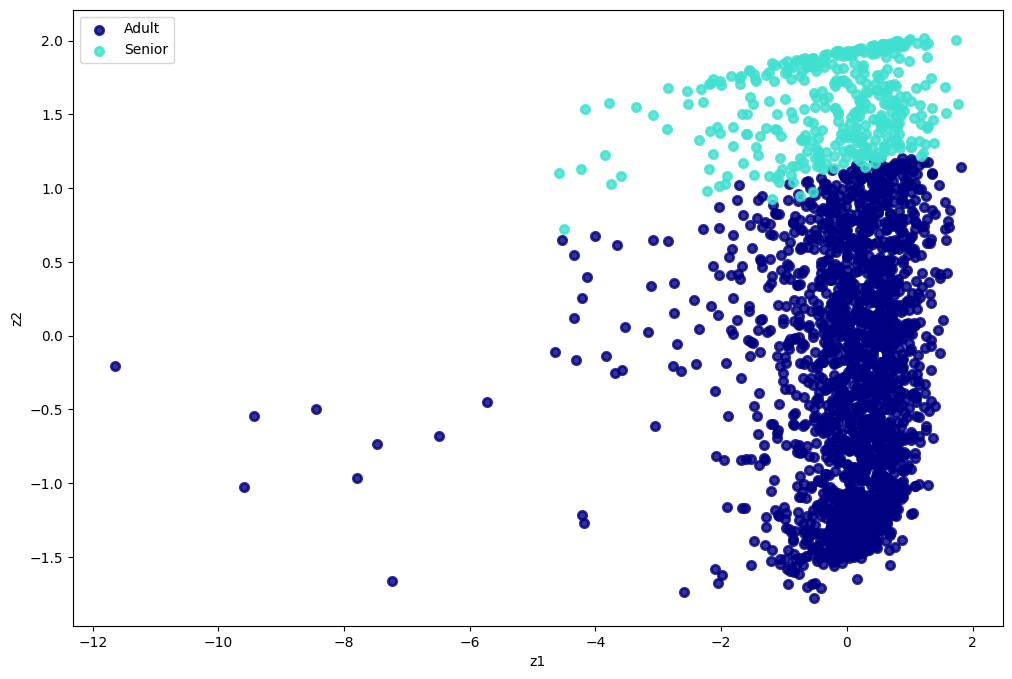

In [29]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], dataset2):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [30]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

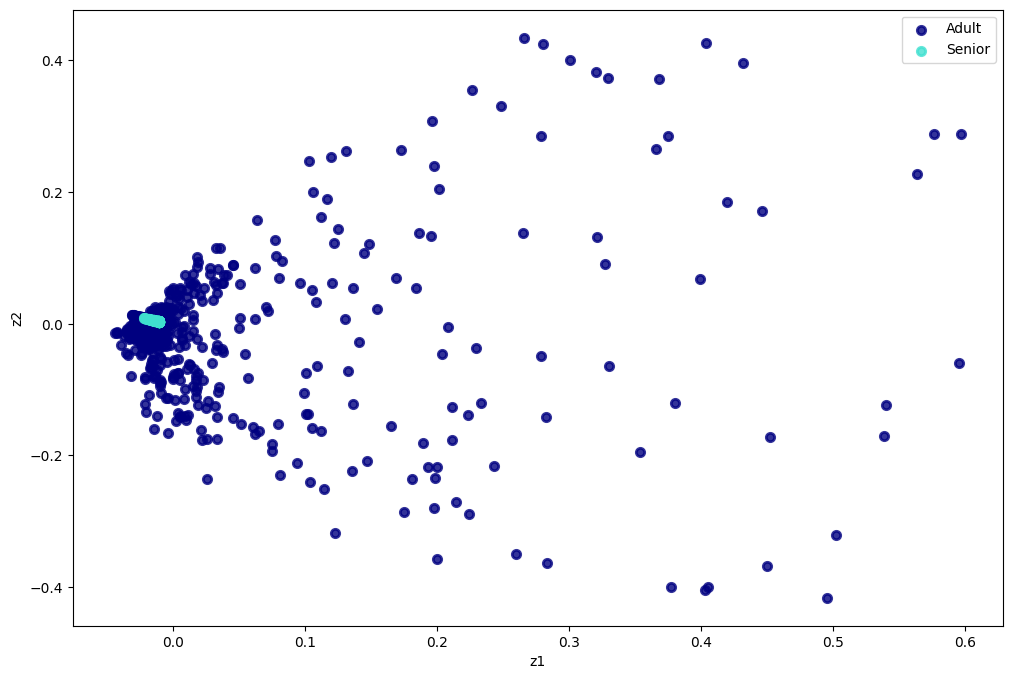

In [31]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], dataset2):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [34]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (2278, 8)
New Shape of X:  (2278, 2)
Kullback-Leibler divergence after optimization:  1.0754926204681396
No. of iterations:  999


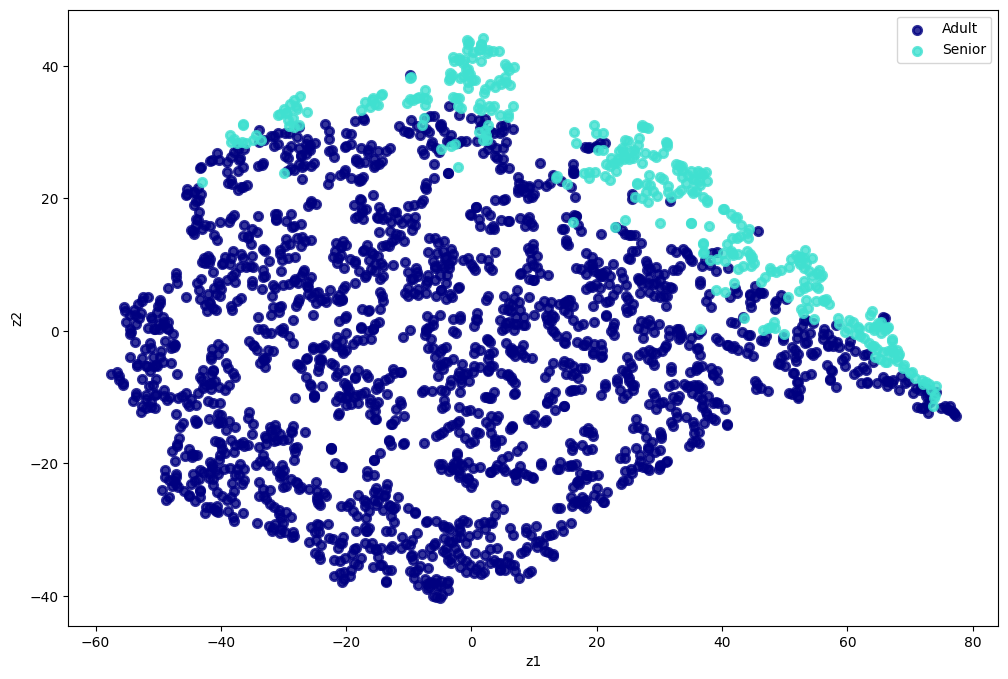

In [35]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], dataset2):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [47]:
dbscan_cluster1 = DBSCAN(eps = 3, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [48]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 10
Estimated no. of noise points: 2248
v_measure = 0.008557643749730432


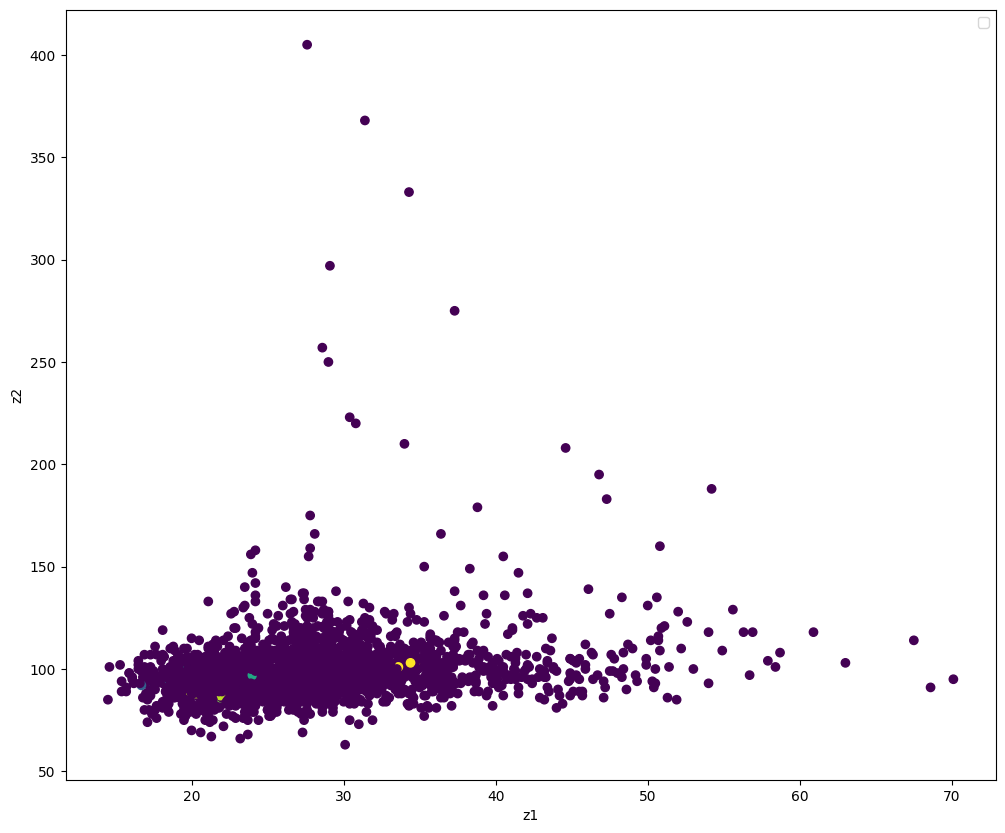

In [54]:
plt.figure(figsize=(12,10))
colors = ["navy", "turquoise"]
lw = 2
#SEQN	age_group	RIDAGEYR	RIAGENDR	PAQ605	BMXBMI	LBXGLU	DIQ010	LBXGLT	LBXIN
cols=['SEQN','age_group','RIAGENDR','PAQ605','BMXBMI','LBXGLU','DIQ010','LBXGLT','LBXIN']
plt.scatter(
        X[cols[4]], X[cols[5]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [55]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [56]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

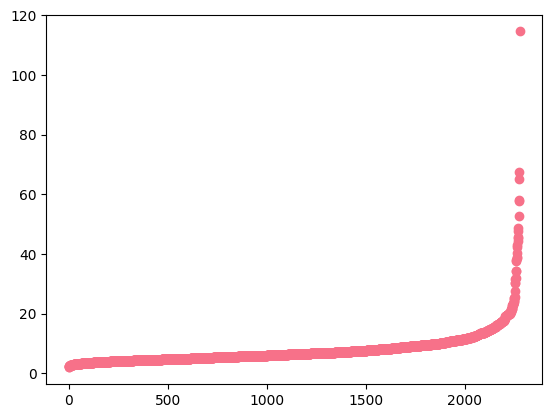

In [57]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

eps=20, так как лежит в изгибе графика

In [59]:
dbscan = DBSCAN(eps = 20, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=20, min_samples=3)


In [60]:
pred = dbscan.fit_predict(X)

In [61]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 6
Estimated no. of noise points: 49
v_measure = 0.018866776653424542


In [62]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

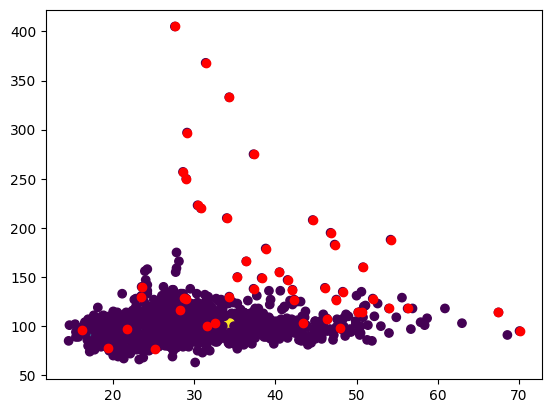

In [63]:
plt.scatter( X[cols[4]], X[cols[5]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[4]], values[cols[5]], color='r')
plt.show()